<a href="https://colab.research.google.com/github/Shreya-07/Dimensionality_Reduction/blob/main/cmpe255_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE DATA SET

Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as LA
from scipy import optimize

!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn import manifold

from matplotlib import pyplot as plt
import imageio
import tqdm

     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 19.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=6edc8124b237556bacbf3be210f8aacb9e56238f3aa6e6d26d8bfd2eb7129f17
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=ea70af2bf588c3dbbc015509b8918681ed6161cd519ba07beb06bfd6bbd4c70c
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


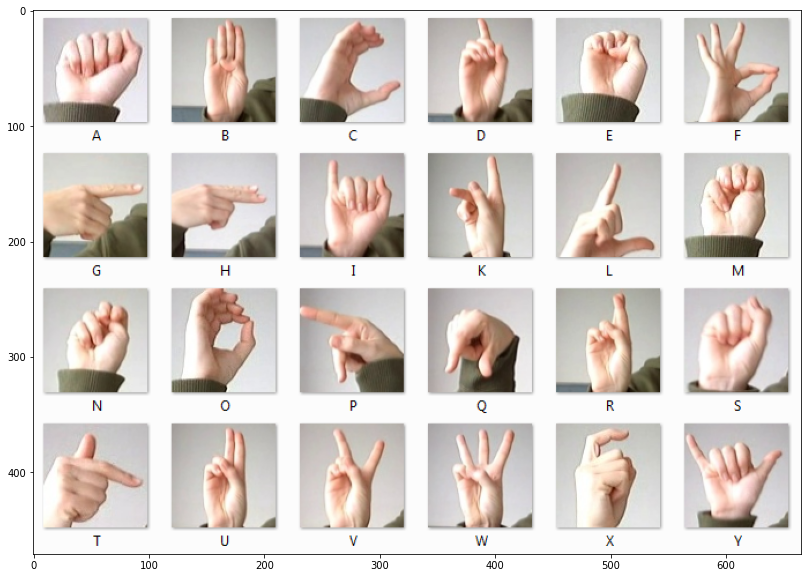

In [4]:
fig = plt.figure(figsize=(20,10))
image = imageio.imread('/content/drive/MyDrive/amer_sign2.png')
plt.imshow(image)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
df.head()
df.shape

(27455, 785)

In [6]:
letter2encode = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'K': 9,'L': 10,'M': 11,
                'N': 12,'O': 13,'P': 14,'Q': 15,'R': 16,'S': 17,'T': 18,'U': 19,'V': 20,'W': 21,'X': 22, 'Y': 23}

def fix_label_gap(l):
    if(l>=9):
        return (l-1)
    else:
        return l

def encode(character):
    return letter2encode[character]

df['label'] = df['label'].apply(fix_label_gap)

[18, 7, 0, 12, 9, 17]


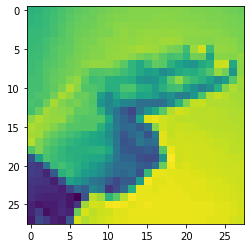

In [7]:
WORD = 'THANKS'

word = np.array(list(WORD))
embedded_word = list(map(encode, word))
print(embedded_word)

reduced_df = df[df['label'].isin(embedded_word)]

reduced_df.shape
X = reduced_df.loc[:, reduced_df.columns != 'label'].values

len(X)
y = reduced_df['label'].values

plt.imshow(X[12].reshape(28,28))

PCA

Text(0.5, 1.0, 'Principal Component Analysis')

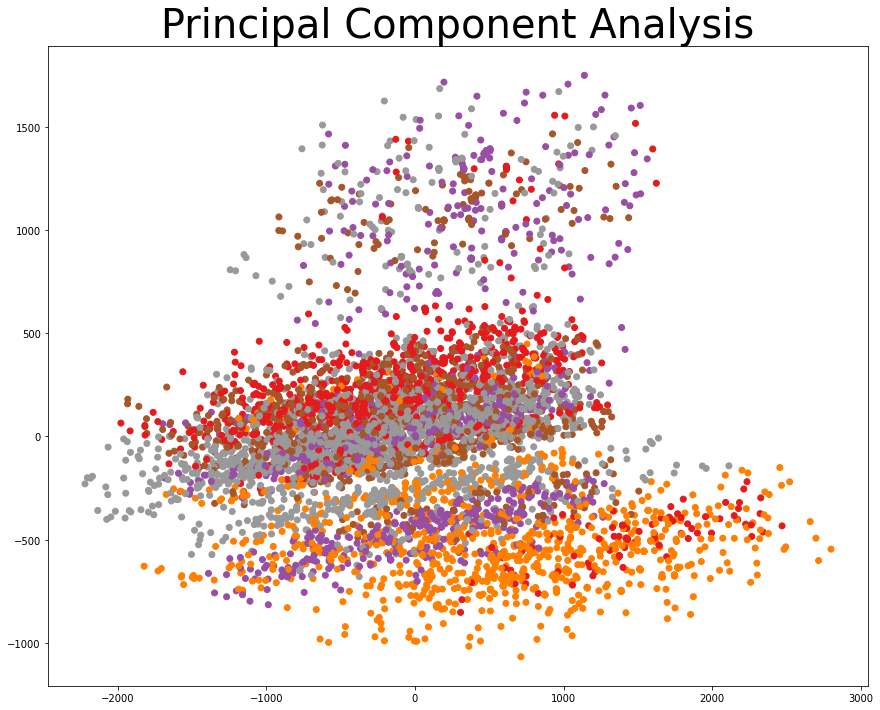

In [8]:
X_PCA = PCA(n_components=5).fit_transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,1)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='Set1')
plt.title("Principal Component Analysis", fontsize=40)

TSNE

Text(0.5, 1.0, 't-Distributed Stochastic Neighbor Embedding')

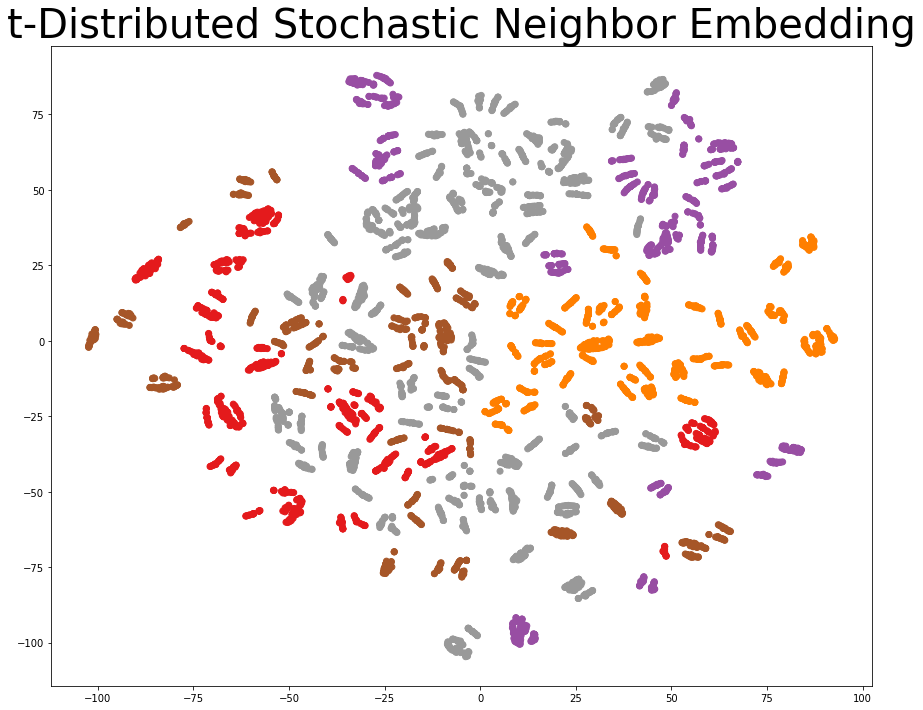

In [11]:
X_TSNE = TSNE().fit_transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,4)
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='Set1')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=40)

LLE

Text(0.5, 1.0, 'Locally Linear Embedding')

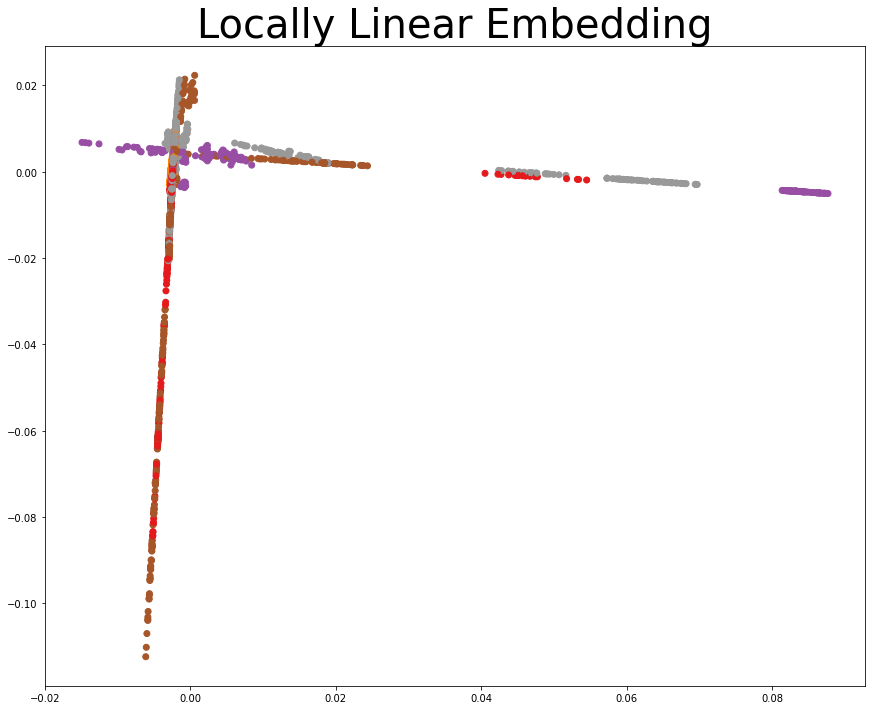

In [12]:
X_LLE = LLE(n_neighbors=30, n_components=2,method='standard')
X_LLE = X_LLE.fit_transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,5)
plt.scatter(X_LLE[:,0], X_LLE[:,1], c=y, cmap='Set1')
plt.title("Locally Linear Embedding", fontsize=40)

UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'Uniform Manifold Approximation and Projections')

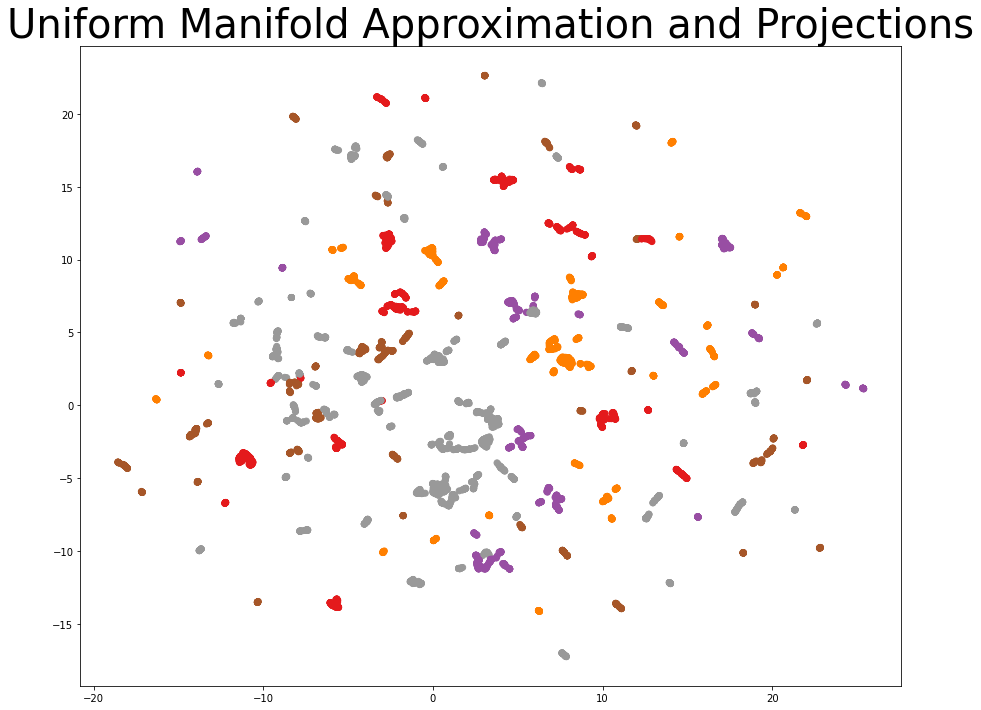

In [13]:
X_UMAP = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean').fit_transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,2)
plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title("Uniform Manifold Approximation and Projections", fontsize=40)

SVD

Text(0.5, 1.0, 'SVD')

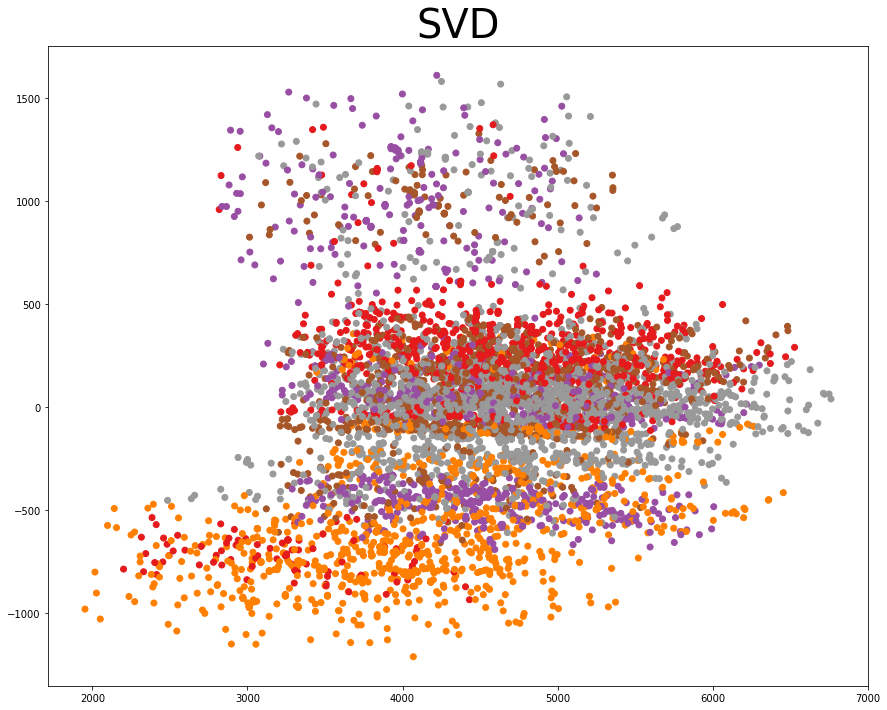

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X)
X_SVD= svd.transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,6)
plt.scatter(X_SVD[:,0], X_SVD[:,1], c=y, cmap='Set1')
plt.title("SVD", fontsize=40)

ISOMAP

Text(0.5, 1.0, 'ISOMAP')

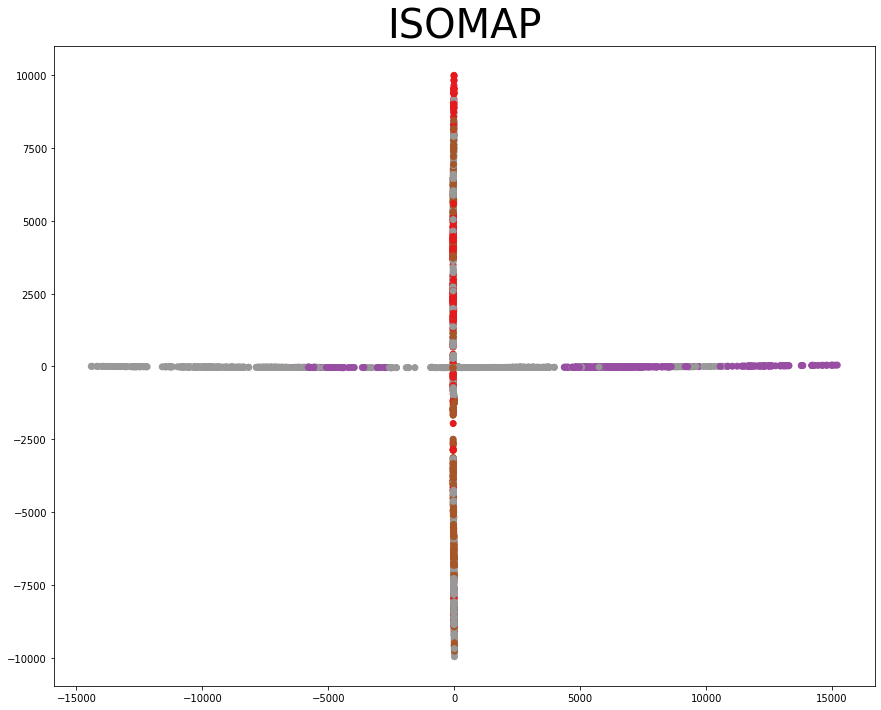

In [15]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
X_ISOMAP = iso.transform(X)
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,7)
plt.scatter(X_ISOMAP[:,0], X_ISOMAP[:,1], c=y, cmap='Set1')
plt.title("ISOMAP", fontsize=40)

Numeric Dataset

Importing libraries

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
(X, y) = load_breast_cancer(return_X_y = True)
import matplotlib.pyplot as plt

PCA

(569, 30) (569, 2)


Text(0.5, 1.0, 'Principal Component Analysis')

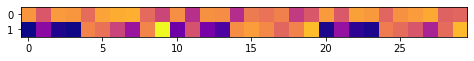

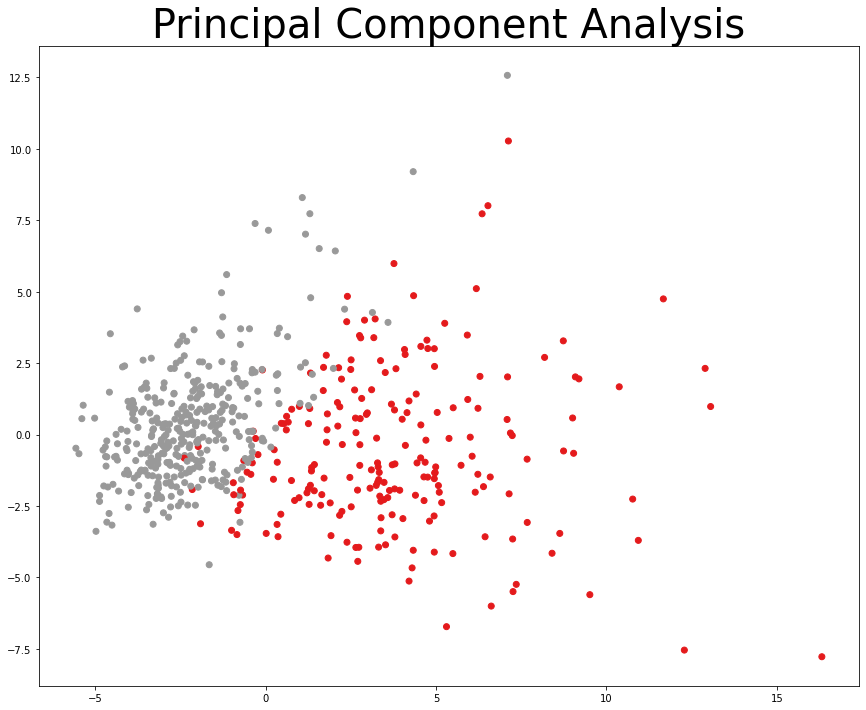

In [18]:
X_normalized = StandardScaler().fit(X).transform(X)
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
fig = plt.figure(figsize=(50,40))
plt.subplot(3,3,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Set1')
plt.title("Principal Component Analysis", fontsize=40)

TSNE

(569, 30) (569, 2)


Text(0.5, 1.0, 'TSNE')

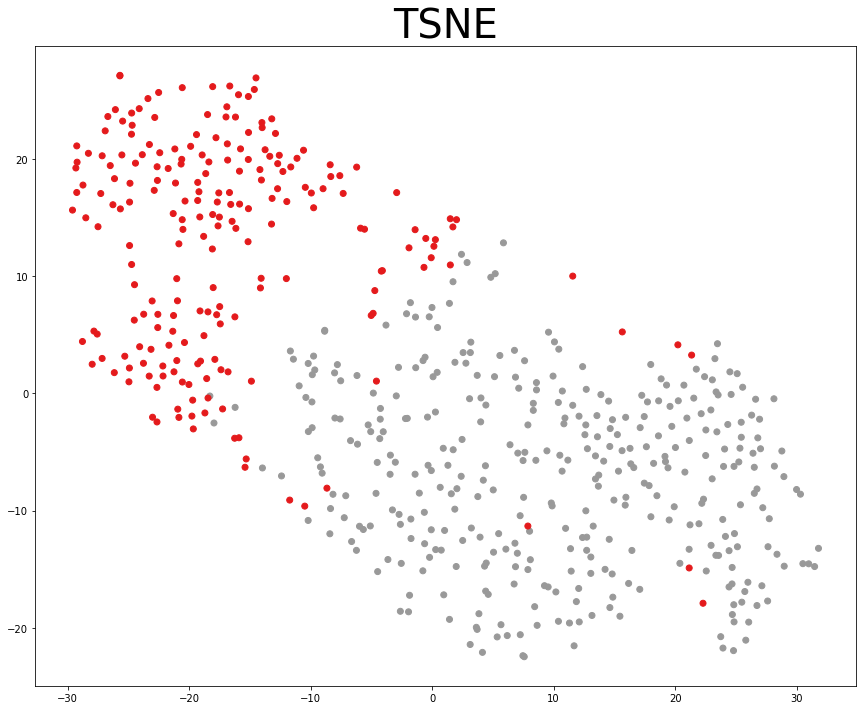

In [19]:
from sklearn.manifold import TSNE
X_normalized = StandardScaler().fit(X).transform(X)
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(X_normalized)
print(X.shape, X_tsne.shape)
fig = plt.figure(figsize=(50, 40))
plt.subplot(3,3,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='Set1')
plt.title("TSNE", fontsize=40)

SVD

(569, 2)


Text(0.5, 1.0, 'SVD')

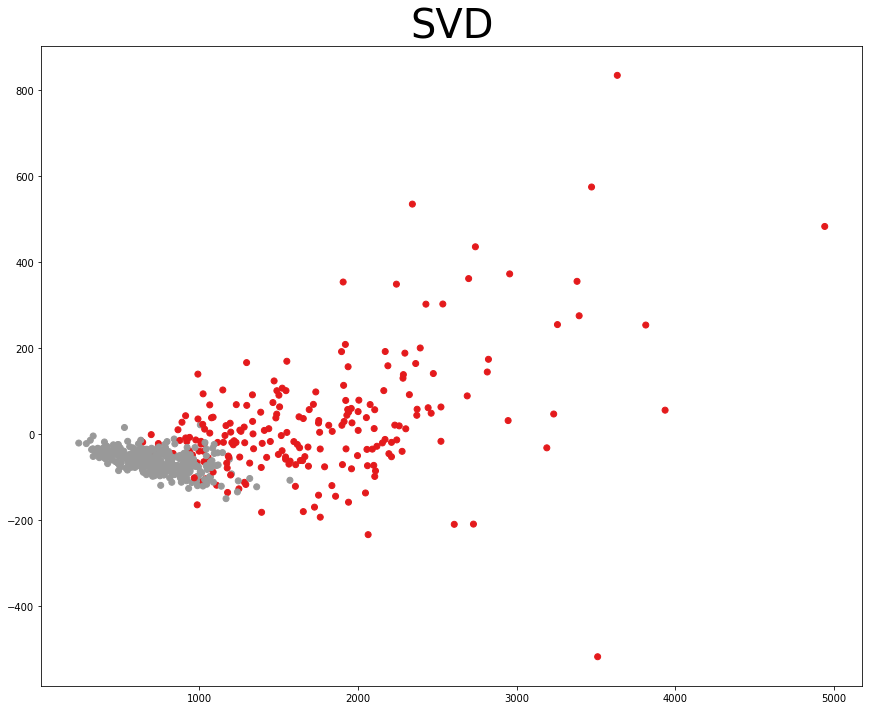

In [20]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X)
X_SVD = svd.transform(X)
print(X_SVD.shape)
fig = plt.figure(figsize=(50, 40))
plt.subplot(3,3,3)
plt.scatter(X_SVD[:,0], X_SVD[:,1], c=y, cmap='Set1')
plt.title("SVD", fontsize=40)

ISOMAP

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


Text(0.5, 1.0, 'ISOMAP')

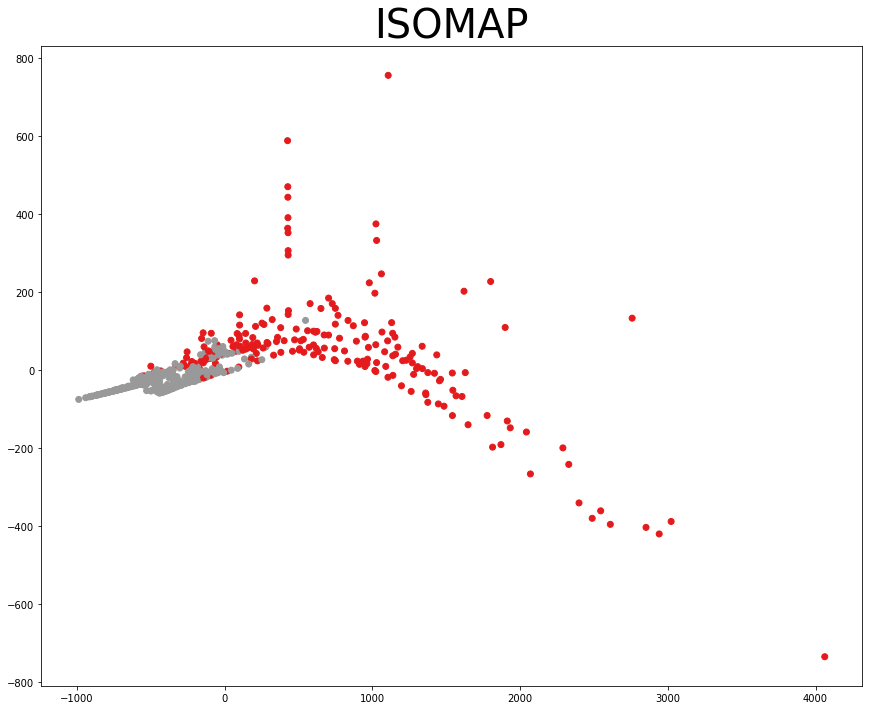

In [21]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
isomap_transform = iso.transform(X)
fig = plt.figure(figsize=(50, 40))
plt.subplot(3,3,4)
plt.scatter(isomap_transform[:,0], isomap_transform[:,1], c=y, cmap='Set1')
plt.title("ISOMAP", fontsize=40)

UMAP

Text(0.5, 1.0, 'UMAP')

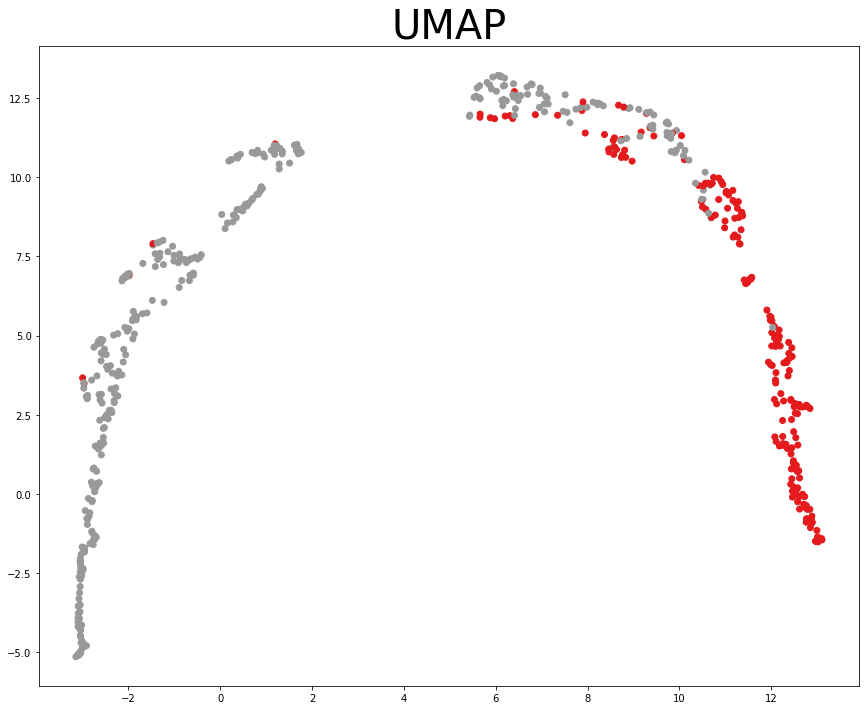

In [22]:
X_UMAP = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean').fit_transform(X)
fig = plt.figure(figsize=(50, 40))
plt.subplot(3,3,5)
plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title("UMAP", fontsize=40)

LLE

Text(0.5, 1.0, 'LLE')

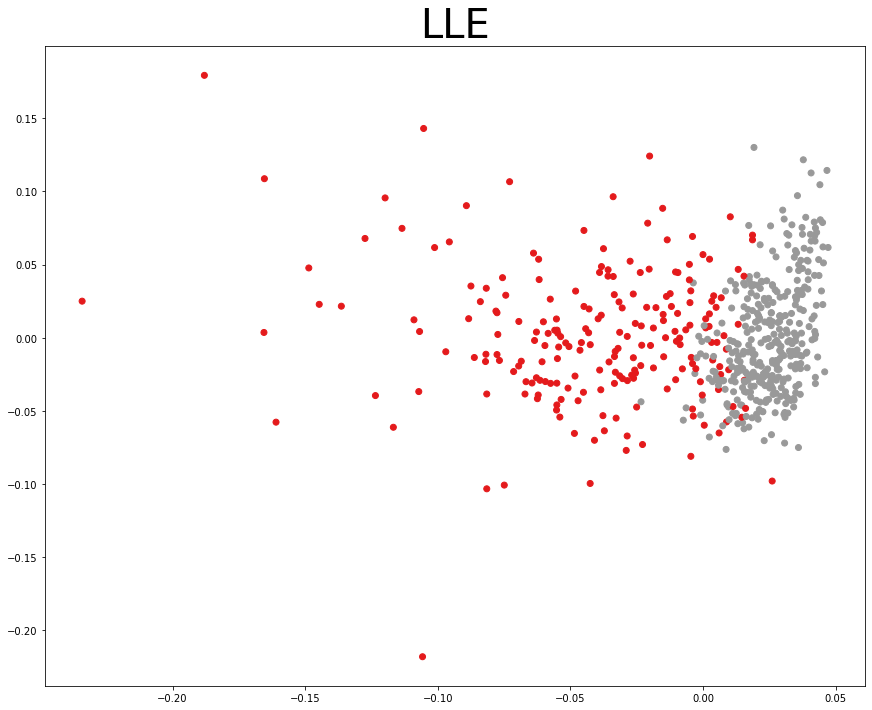

In [23]:
X_LLE = LLE(n_neighbors=30, n_components=2,method='standard')
X_mlle = X_LLE.fit_transform(X)
fig = plt.figure(figsize=(50, 40))
plt.subplot(3,3,6)
plt.scatter(X_mlle[:,0], X_mlle[:,1], c=y, cmap='Set1')
plt.title("LLE", fontsize=40)